In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10939021340697130833
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5738397696
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7342036305458357873
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:2b:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [6]:
tf.debugging.set_log_device_placement(True)

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1/255.)

In [8]:
train_generator = train_datagen.flow_from_directory(
    'korean_emotion_sample/train_data',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical')

Found 3200 images belonging to 7 classes.


In [9]:
validation_datagen = ImageDataGenerator(
    rescale=1/255.)

In [10]:
validation_generator = validation_datagen.flow_from_directory(
    'korean_emotion_sample/validation_data',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical')

Found 800 images belonging to 7 classes.


In [11]:
with tf.device('/gpu:0'):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.5)) # 50% 를 누락
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(7, activation='sigmoid'))

    model.summary()

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job

 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dropout (Dropout)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3211776   
                                                                 
 dense_1 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 3,456,199
Trainable params: 3,456,199
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['acc'])

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [13]:
history = model.fit(train_generator, epochs=80, steps_per_epoch=100,
                validation_data=validation_generator, validation_steps=20)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in dev

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  3/100 [..............................] - ETA: 25s - loss: 1.9242 - acc: 0.1458 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  4/100 [>.............................] - ETA: 33s - loss: 1.9379 - acc: 0.1484Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  5/100 [>.............................] - ETA: 36s - loss: 1.9516 - acc: 0.1437Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0

 27/100 [=======>......................] - ETA: 33s - loss: 1.9520 - acc: 0.1412Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 28/100 [=======>......................] - ETA: 33s - loss: 1.9522 - acc: 0.1406Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 29/100 [=======>......................] - ETA: 32s - loss: 1.9515 - acc: 0.1444Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 51/100 [==============>...............] - ETA: 22s - loss: 1.9503 - acc: 0.1440Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 52/100 [==============>...............] - ETA: 22s - loss: 1.9500 - acc: 0.1424Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 53/100 [==============>...............] - ETA: 21s - loss: 1.9498 - acc: 0.1433Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 75/100 [=====================>........] - ETA: 11s - loss: 1.9504 - acc: 0.1446Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 76/100 [=====================>........] - ETA: 11s - loss: 1.9505 - acc: 0.1439Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 77/100 [======================>.......] - ETA: 10s - loss: 1.9506 - acc: 0.1429Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 99/100 [============================>.] - ETA: 0s - loss: 1.9505 - acc: 0.1383Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
100/100 [==============================] - ETA: 0s - loss: 1.9507 - acc: 0.1375Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op 

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 2/80
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/100 [..............................] - ETA: 1:02 - loss: 1.9449 - acc: 0.0938Executing op ReadVariableOp in device /job:localhost/replica:0/task:

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 23/100 [=====>........................] - ETA: 38s - loss: 1.9475 - acc: 0.1291Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 24/100 [======>.......................] - ETA: 37s - loss: 1.9474 - acc: 0.1328Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 25/100 [======>.......................] - ETA: 37s - loss: 1.9469 - acc: 0.1350Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 47/100 [=============>................] - ETA: 26s - loss: 1.9467 - acc: 0.1330Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 48/100 [=============>................] - ETA: 25s - loss: 1.9467 - acc: 0.1322Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 49/100 [=============>................] - ETA: 25s - loss: 1.9466 - acc: 0.1327Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 71/100 [====================>.........] - ETA: 14s - loss: 1.9471 - acc: 0.1342Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 72/100 [====================>.........] - ETA: 13s - loss: 1.9472 - acc: 0.1350Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 73/100 [====================>.........] - ETA: 13s - loss: 1.9474 - acc: 0.1336Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 95/100 [===========================>..] - ETA: 2s - loss: 1.9476 - acc: 0.1342Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 96/100 [===========================>..] - ETA: 1s - loss: 1.9475 - acc: 0.1357Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 97/100 [============================>.] - ETA: 1s - loss: 1.9474 - acc: 0.1372Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
100/100 [==============================] - 62s 617ms/step - loss: 1.9475 - acc: 0.1381 - val_loss: 1.9463 - val_acc: 0.1422
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in 

 21/100 [=====>........................] - ETA: 36s - loss: 1.9458 - acc: 0.1518Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 22/100 [=====>........................] - ETA: 35s - loss: 1.9458 - acc: 0.1506Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 23/100 [=====>........................] - ETA: 35s - loss: 1.9461 - acc: 0.1495Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 45/100 [============>.................] - ETA: 25s - loss: 1.9458 - acc: 0.1507Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 46/100 [============>.................] - ETA: 25s - loss: 1.9462 - acc: 0.1488Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 47/100 [=============>................] - ETA: 25s - loss: 1.9465 - acc: 0.1483Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 69/100 [===================>..........] - ETA: 14s - loss: 1.9466 - acc: 0.1486Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 70/100 [====================>.........] - ETA: 14s - loss: 1.9466 - acc: 0.1473Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 71/100 [====================>.........] - ETA: 13s - loss: 1.9465 - acc: 0.1492Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 93/100 [==========================>...] - ETA: 3s - loss: 1.9468 - acc: 0.1465Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 94/100 [===========================>..] - ETA: 2s - loss: 1.9467 - acc: 0.1459Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 95/100 [===========================>..] - ETA: 2s - loss: 1.9467 - acc: 0.1447Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
100/100 [==============================] - 62s 618ms/step - loss: 1.9467 - acc: 0.1441 - val_loss: 1.9463 - val_acc: 0.1516
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

 19/100 [====>.........................] - ETA: 38s - loss: 1.9444 - acc: 0.1365Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 20/100 [=====>........................] - ETA: 38s - loss: 1.9445 - acc: 0.1344Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 21/100 [=====>........................] - ETA: 37s - loss: 1.9451 - acc: 0.1339Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 43/100 [===========>..................] - ETA: 27s - loss: 1.9446 - acc: 0.1548Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 44/100 [============>.................] - ETA: 26s - loss: 1.9446 - acc: 0.1555Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 45/100 [============>.................] - ETA: 26s - loss: 1.9447 - acc: 0.1549Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 67/100 [===================>..........] - ETA: 15s - loss: 1.9452 - acc: 0.1516Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 68/100 [===================>..........] - ETA: 15s - loss: 1.9452 - acc: 0.1521Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 69/100 [===================>..........] - ETA: 14s - loss: 1.9451 - acc: 0.1522Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 91/100 [==========================>...] - ETA: 4s - loss: 1.9453 - acc: 0.1518Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 92/100 [==========================>...] - ETA: 3s - loss: 1.9453 - acc: 0.1522Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 93/100 [==========================>...] - ETA: 3s - loss: 1.9453 - acc: 0.1515Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:loca

 17/100 [====>.........................] - ETA: 40s - loss: 1.9389 - acc: 0.1618Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/100 [====>.........................] - ETA: 39s - loss: 1.9387 - acc: 0.1684Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 19/100 [====>.........................] - ETA: 39s - loss: 1.9406 - acc: 0.1694Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 41/100 [===========>..................] - ETA: 28s - loss: 1.9410 - acc: 0.1684Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 42/100 [===========>..................] - ETA: 27s - loss: 1.9406 - acc: 0.1696Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 43/100 [===========>..................] - ETA: 27s - loss: 1.9405 - acc: 0.1701Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 65/100 [==================>...........] - ETA: 16s - loss: 1.9407 - acc: 0.1606Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 66/100 [==================>...........] - ETA: 16s - loss: 1.9409 - acc: 0.1605Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 67/100 [===================>..........] - ETA: 15s - loss: 1.9411 - acc: 0.1623Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 89/100 [=========================>....] - ETA: 5s - loss: 1.9411 - acc: 0.1605Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 90/100 [==========================>...] - ETA: 4s - loss: 1.9412 - acc: 0.1608Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 91/100 [==========================>...] - ETA: 4s - loss: 1.9413 - acc: 0.1600Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loca

 15/100 [===>..........................] - ETA: 40s - loss: 1.9413 - acc: 0.1646Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 16/100 [===>..........................] - ETA: 39s - loss: 1.9416 - acc: 0.1699Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 17/100 [====>.........................] - ETA: 39s - loss: 1.9418 - acc: 0.1691Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 39/100 [==========>...................] - ETA: 28s - loss: 1.9405 - acc: 0.1699Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 40/100 [===========>..................] - ETA: 28s - loss: 1.9406 - acc: 0.1719Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 41/100 [===========>..................] - ETA: 27s - loss: 1.9408 - acc: 0.1707Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 63/100 [=================>............] - ETA: 17s - loss: 1.9392 - acc: 0.1637Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 64/100 [==================>...........] - ETA: 17s - loss: 1.9391 - acc: 0.1650Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 65/100 [==================>...........] - ETA: 16s - loss: 1.9392 - acc: 0.1639Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 87/100 [=========================>....] - ETA: 6s - loss: 1.9401 - acc: 0.1627Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 88/100 [=========================>....] - ETA: 5s - loss: 1.9401 - acc: 0.1623Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 89/100 [=========================>....] - ETA: 5s - loss: 1.9402 - acc: 0.1622Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:loca

 13/100 [==>...........................] - ETA: 39s - loss: 1.9328 - acc: 0.1875Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 14/100 [===>..........................] - ETA: 40s - loss: 1.9322 - acc: 0.1853Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 15/100 [===>..........................] - ETA: 39s - loss: 1.9345 - acc: 0.1750Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 37/100 [==========>...................] - ETA: 30s - loss: 1.9348 - acc: 0.1782Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 38/100 [==========>...................] - ETA: 29s - loss: 1.9351 - acc: 0.1785Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 39/100 [==========>...................] - ETA: 29s - loss: 1.9354 - acc: 0.1795Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 61/100 [=================>............] - ETA: 18s - loss: 1.9353 - acc: 0.1778Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 62/100 [=================>............] - ETA: 18s - loss: 1.9352 - acc: 0.1784Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 63/100 [=================>............] - ETA: 17s - loss: 1.9348 - acc: 0.1801Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 85/100 [========================>.....] - ETA: 7s - loss: 1.9345 - acc: 0.1835Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 86/100 [========================>.....] - ETA: 6s - loss: 1.9345 - acc: 0.1828Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 87/100 [=========================>....] - ETA: 6s - loss: 1.9345 - acc: 0.1814Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:loca

 11/100 [==>...........................] - ETA: 41s - loss: 1.9236 - acc: 0.1847Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 12/100 [==>...........................] - ETA: 41s - loss: 1.9259 - acc: 0.1849Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 13/100 [==>...........................] - ETA: 40s - loss: 1.9249 - acc: 0.1803Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 35/100 [=========>....................] - ETA: 30s - loss: 1.9239 - acc: 0.2045Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 36/100 [=========>....................] - ETA: 30s - loss: 1.9229 - acc: 0.2049Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 37/100 [==========>...................] - ETA: 29s - loss: 1.9234 - acc: 0.2044Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 59/100 [================>.............] - ETA: 19s - loss: 1.9274 - acc: 0.1992Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 60/100 [=================>............] - ETA: 19s - loss: 1.9275 - acc: 0.1990Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 61/100 [=================>............] - ETA: 18s - loss: 1.9281 - acc: 0.1972Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 83/100 [=======================>......] - ETA: 8s - loss: 1.9302 - acc: 0.1864Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 84/100 [========================>.....] - ETA: 7s - loss: 1.9302 - acc: 0.1864Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 85/100 [========================>.....] - ETA: 7s - loss: 1.9299 - acc: 0.1882Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/100 [==>...........................] - ETA: 40s - loss: 1.9196 - acc: 0.2375Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 11/100 [==>...........................] - ETA: 39s - loss: 1.9198 - acc: 0.2358Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 12/100 [==>...........................] - ETA: 40s - loss: 1.9204 - acc: 0.2370Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 34/100 [=========>....................] - ETA: 31s - loss: 1.9147 - acc: 0.2123Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 35/100 [=========>....................] - ETA: 31s - loss: 1.9167 - acc: 0.2107Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 36/100 [=========>....................] - ETA: 30s - loss: 1.9161 - acc: 0.2109Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 58/100 [================>.............] - ETA: 20s - loss: 1.9207 - acc: 0.1994Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 59/100 [================>.............] - ETA: 19s - loss: 1.9208 - acc: 0.1986Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 60/100 [=================>............] - ETA: 19s - loss: 1.9210 - acc: 0.1979Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 82/100 [=======================>......] - ETA: 8s - loss: 1.9231 - acc: 0.1940Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 83/100 [=======================>......] - ETA: 8s - loss: 1.9232 - acc: 0.1943Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 84/100 [========================>.....] - ETA: 7s - loss: 1.9232 - acc: 0.1942Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/100 [=>............................] - ETA: 45s - loss: 1.9169 - acc: 0.2257Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/100 [==>...........................] - ETA: 45s - loss: 1.9200 - acc: 0.2250Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 11/100 [==>...........................] - ETA: 44s - loss: 1.9174 - acc: 0.2244Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/100 [========>.....................] - ETA: 32s - loss: 1.9147 - acc: 0.2169Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 34/100 [=========>....................] - ETA: 31s - loss: 1.9158 - acc: 0.2142Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 35/100 [=========>....................] - ETA: 31s - loss: 1.9140 - acc: 0.2134Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 57/100 [================>.............] - ETA: 20s - loss: 1.9151 - acc: 0.2029Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 58/100 [================>.............] - ETA: 20s - loss: 1.9157 - acc: 0.2037Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 59/100 [================>.............] - ETA: 19s - loss: 1.9143 - acc: 0.2066Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 81/100 [=======================>......] - ETA: 9s - loss: 1.9168 - acc: 0.2006Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 82/100 [=======================>......] - ETA: 8s - loss: 1.9167 - acc: 0.2008Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 83/100 [=======================>......] - ETA: 8s - loss: 1.9167 - acc: 0.2022Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/100 [=>............................] - ETA: 45s - loss: 1.8880 - acc: 0.2500Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/100 [=>............................] - ETA: 45s - loss: 1.8932 - acc: 0.2361Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/100 [==>...........................] - ETA: 46s - loss: 1.8986 - acc: 0.2219Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/100 [========>.....................] - ETA: 33s - loss: 1.9005 - acc: 0.2217Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/100 [========>.....................] - ETA: 33s - loss: 1.9020 - acc: 0.2206Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 34/100 [=========>....................] - ETA: 32s - loss: 1.9046 - acc: 0.2169Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 56/100 [===============>..............] - ETA: 21s - loss: 1.9074 - acc: 0.2132Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 57/100 [================>.............] - ETA: 21s - loss: 1.9068 - acc: 0.2127Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 58/100 [================>.............] - ETA: 20s - loss: 1.9068 - acc: 0.2128Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 80/100 [=======================>......] - ETA: 9s - loss: 1.9052 - acc: 0.2020 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 81/100 [=======================>......] - ETA: 9s - loss: 1.9050 - acc: 0.2002Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 82/100 [=======================>......] - ETA: 8s - loss: 1.9051 - acc: 0.2008Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/ta

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  7/100 [=>............................] - ETA: 47s - loss: 1.8965 - acc: 0.2723Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/100 [=>............................] - ETA: 45s - loss: 1.8949 - acc: 0.2617Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/100 [=>............................] - ETA: 46s - loss: 1.8937 - acc: 0.2396Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 31/100 [========>.....................] - ETA: 33s - loss: 1.8989 - acc: 0.2308Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/100 [========>.....................] - ETA: 33s - loss: 1.8987 - acc: 0.2275Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/100 [========>.....................] - ETA: 32s - loss: 1.8954 - acc: 0.2311Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 55/100 [===============>..............] - ETA: 21s - loss: 1.8958 - acc: 0.2278Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 56/100 [===============>..............] - ETA: 21s - loss: 1.8962 - acc: 0.2266Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 57/100 [================>.............] - ETA: 20s - loss: 1.8973 - acc: 0.2248Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 79/100 [======================>.......] - ETA: 10s - loss: 1.8976 - acc: 0.2282Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 80/100 [=======================>......] - ETA: 9s - loss: 1.8974 - acc: 0.2277 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 81/100 [=======================>......] - ETA: 9s - loss: 1.8964 - acc: 0.2288Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/t

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/devic

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  6/100 [>.............................] - ETA: 38s - loss: 1.8838 - acc: 0.2344Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  7/100 [=>............................] - ETA: 37s - loss: 1.8801 - acc: 0.2277Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/100 [=>............................] - ETA: 38s - loss: 1.8781 - acc: 0.2305Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 30/100 [========>.....................] - ETA: 32s - loss: 1.8723 - acc: 0.2375Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 31/100 [========>.....................] - ETA: 32s - loss: 1.8689 - acc: 0.2429Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/100 [========>.....................] - ETA: 31s - loss: 1.8687 - acc: 0.2441Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 54/100 [===============>..............] - ETA: 21s - loss: 1.8733 - acc: 0.2338Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 55/100 [===============>..............] - ETA: 21s - loss: 1.8741 - acc: 0.2318Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 56/100 [===============>..............] - ETA: 20s - loss: 1.8734 - acc: 0.2310Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 78/100 [======================>.......] - ETA: 10s - loss: 1.8777 - acc: 0.2216Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 79/100 [======================>.......] - ETA: 9s - loss: 1.8775 - acc: 0.2215 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 80/100 [=======================>......] - ETA: 9s - loss: 1.8770 - acc: 0.2219Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/t

Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0


  4/100 [>.............................] - ETA: 39s - loss: 1.8738 - acc: 0.1953Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  5/100 [>.............................] - ETA: 43s - loss: 1.8574 - acc: 0.2188Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  6/100 [>.............................] - ETA: 44s - loss: 1.8687 - acc: 0.1979Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 28/100 [=======>......................] - ETA: 34s - loss: 1.8766 - acc: 0.2132Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 29/100 [=======>......................] - ETA: 33s - loss: 1.8755 - acc: 0.2134Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 30/100 [========>.....................] - ETA: 33s - loss: 1.8721 - acc: 0.2198Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 52/100 [==============>...............] - ETA: 22s - loss: 1.8650 - acc: 0.2314Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 53/100 [==============>...............] - ETA: 22s - loss: 1.8642 - acc: 0.2317Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 54/100 [===============>..............] - ETA: 21s - loss: 1.8656 - acc: 0.2315Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 76/100 [=====================>........] - ETA: 11s - loss: 1.8652 - acc: 0.2311Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 77/100 [======================>.......] - ETA: 10s - loss: 1.8657 - acc: 0.2301Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 78/100 [======================>.......] - ETA: 10s - loss: 1.8656 - acc: 0.2308Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

100/100 [==============================] - ETA: 0s - loss: 1.8682 - acc: 0.2262Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op 

  2/100 [..............................] - ETA: 29s - loss: 1.7594 - acc: 0.3750 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  3/100 [..............................] - ETA: 39s - loss: 1.8024 - acc: 0.3229Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  4/100 [>.............................] - ETA: 43s - loss: 1.8244 - acc: 0.2969Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0

 26/100 [======>.......................] - ETA: 35s - loss: 1.8446 - acc: 0.2416Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 27/100 [=======>......................] - ETA: 34s - loss: 1.8417 - acc: 0.2419Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 28/100 [=======>......................] - ETA: 34s - loss: 1.8399 - acc: 0.2400Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 50/100 [==============>...............] - ETA: 23s - loss: 1.8499 - acc: 0.2306Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 51/100 [==============>...............] - ETA: 23s - loss: 1.8510 - acc: 0.2298Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 52/100 [==============>...............] - ETA: 22s - loss: 1.8494 - acc: 0.2308Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 74/100 [=====================>........] - ETA: 12s - loss: 1.8517 - acc: 0.2411Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 75/100 [=====================>........] - ETA: 11s - loss: 1.8531 - acc: 0.2400Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 76/100 [=====================>........] - ETA: 11s - loss: 1.8534 - acc: 0.2401Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 98/100 [============================>.] - ETA: 0s - loss: 1.8575 - acc: 0.2423Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 99/100 [============================>.] - ETA: 0s - loss: 1.8569 - acc: 0.2427Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
100/100 [==============================] - ETA: 0s - loss: 1.8574 - acc: 0.2419Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 16/80
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/100 [..............................] - ETA: 1:17 - loss: 1.8313 - acc: 0.3750Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  2/100 [..............................] - ETA: 19s - loss: 1.8179 - acc: 0.3125 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:l

 24/100 [======>.......................] - ETA: 37s - loss: 1.8167 - acc: 0.2786Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 25/100 [======>.......................] - ETA: 36s - loss: 1.8181 - acc: 0.2775Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 26/100 [======>.......................] - ETA: 36s - loss: 1.8166 - acc: 0.2825Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 48/100 [=============>................] - ETA: 25s - loss: 1.8337 - acc: 0.2533Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 49/100 [=============>................] - ETA: 24s - loss: 1.8353 - acc: 0.2526Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 50/100 [==============>...............] - ETA: 24s - loss: 1.8362 - acc: 0.2506Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 72/100 [====================>.........] - ETA: 13s - loss: 1.8389 - acc: 0.2513Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 73/100 [====================>.........] - ETA: 13s - loss: 1.8401 - acc: 0.2500Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 74/100 [=====================>........] - ETA: 12s - loss: 1.8413 - acc: 0.2492Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 96/100 [===========================>..] - ETA: 1s - loss: 1.8418 - acc: 0.2523Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 97/100 [============================>.] - ETA: 1s - loss: 1.8412 - acc: 0.2532Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 98/100 [============================>.] - ETA: 0s - loss: 1.8416 - acc: 0.2522Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 17/80
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/

 22/100 [=====>........................] - ETA: 36s - loss: 1.8227 - acc: 0.2699Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 23/100 [=====>........................] - ETA: 35s - loss: 1.8251 - acc: 0.2649Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 24/100 [======>.......................] - ETA: 35s - loss: 1.8245 - acc: 0.2682Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 46/100 [============>.................] - ETA: 25s - loss: 1.8253 - acc: 0.2656Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 47/100 [=============>................] - ETA: 25s - loss: 1.8272 - acc: 0.2626Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 48/100 [=============>................] - ETA: 25s - loss: 1.8308 - acc: 0.2604Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 70/100 [====================>.........] - ETA: 14s - loss: 1.8318 - acc: 0.2594Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 71/100 [====================>.........] - ETA: 13s - loss: 1.8320 - acc: 0.2579Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 72/100 [====================>.........] - ETA: 13s - loss: 1.8328 - acc: 0.2578Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 94/100 [===========================>..] - ETA: 2s - loss: 1.8315 - acc: 0.2560Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 95/100 [===========================>..] - ETA: 2s - loss: 1.8323 - acc: 0.2553Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 96/100 [===========================>..] - ETA: 1s - loss: 1.8329 - acc: 0.2539Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
100/100 [==============================] - 61s 613ms/step - loss: 1.8321 - acc: 0.2541 - val_loss: 2.0122 - val_acc: 0.1437
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariable

 20/100 [=====>........................] - ETA: 37s - loss: 1.8012 - acc: 0.3047Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 21/100 [=====>........................] - ETA: 37s - loss: 1.7983 - acc: 0.3051Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 22/100 [=====>........................] - ETA: 37s - loss: 1.7964 - acc: 0.3082Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 44/100 [============>.................] - ETA: 27s - loss: 1.7881 - acc: 0.2983Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 45/100 [============>.................] - ETA: 26s - loss: 1.7889 - acc: 0.2979Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 46/100 [============>.................] - ETA: 26s - loss: 1.7892 - acc: 0.2969Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 68/100 [===================>..........] - ETA: 15s - loss: 1.7968 - acc: 0.2831Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 69/100 [===================>..........] - ETA: 14s - loss: 1.7971 - acc: 0.2826Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 70/100 [====================>.........] - ETA: 14s - loss: 1.7967 - acc: 0.2835Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 92/100 [==========================>...] - ETA: 3s - loss: 1.8072 - acc: 0.2728Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 93/100 [==========================>...] - ETA: 3s - loss: 1.8078 - acc: 0.2728Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 94/100 [===========================>..] - ETA: 2s - loss: 1.8075 - acc: 0.2729Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loca

 18/100 [====>.........................] - ETA: 40s - loss: 1.7941 - acc: 0.2760Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 19/100 [====>.........................] - ETA: 39s - loss: 1.7950 - acc: 0.2763Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 20/100 [=====>........................] - ETA: 38s - loss: 1.7958 - acc: 0.2781Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 42/100 [===========>..................] - ETA: 27s - loss: 1.7962 - acc: 0.2857Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 43/100 [===========>..................] - ETA: 27s - loss: 1.7948 - acc: 0.2863Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 44/100 [============>.................] - ETA: 26s - loss: 1.7954 - acc: 0.2841Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 66/100 [==================>...........] - ETA: 16s - loss: 1.7865 - acc: 0.2869Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 67/100 [===================>..........] - ETA: 15s - loss: 1.7865 - acc: 0.2868Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 68/100 [===================>..........] - ETA: 15s - loss: 1.7872 - acc: 0.2858Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 90/100 [==========================>...] - ETA: 4s - loss: 1.7915 - acc: 0.2847Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 91/100 [==========================>...] - ETA: 4s - loss: 1.7935 - acc: 0.2833Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 92/100 [==========================>...] - ETA: 3s - loss: 1.7930 - acc: 0.2833Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:loca

 16/100 [===>..........................] - ETA: 40s - loss: 1.7322 - acc: 0.3398Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 17/100 [====>.........................] - ETA: 39s - loss: 1.7399 - acc: 0.3327Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/100 [====>.........................] - ETA: 38s - loss: 1.7412 - acc: 0.3333Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 40/100 [===========>..................] - ETA: 28s - loss: 1.7619 - acc: 0.3086Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 41/100 [===========>..................] - ETA: 28s - loss: 1.7637 - acc: 0.3064Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 42/100 [===========>..................] - ETA: 27s - loss: 1.7627 - acc: 0.3058Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 64/100 [==================>...........] - ETA: 17s - loss: 1.7644 - acc: 0.3081Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 65/100 [==================>...........] - ETA: 16s - loss: 1.7637 - acc: 0.3087Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 66/100 [==================>...........] - ETA: 16s - loss: 1.7643 - acc: 0.3078Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 88/100 [=========================>....] - ETA: 5s - loss: 1.7710 - acc: 0.3061Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 89/100 [=========================>....] - ETA: 5s - loss: 1.7707 - acc: 0.3058Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 90/100 [==========================>...] - ETA: 4s - loss: 1.7716 - acc: 0.3049Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:loca

 14/100 [===>..........................] - ETA: 38s - loss: 1.7421 - acc: 0.3080Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 15/100 [===>..........................] - ETA: 38s - loss: 1.7367 - acc: 0.3104Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 16/100 [===>..........................] - ETA: 37s - loss: 1.7325 - acc: 0.3145Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 38/100 [==========>...................] - ETA: 29s - loss: 1.7464 - acc: 0.3100Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 39/100 [==========>...................] - ETA: 29s - loss: 1.7481 - acc: 0.3101Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 40/100 [===========>..................] - ETA: 28s - loss: 1.7481 - acc: 0.3102Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 62/100 [=================>............] - ETA: 18s - loss: 1.7541 - acc: 0.3070Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 63/100 [=================>............] - ETA: 17s - loss: 1.7527 - acc: 0.3085Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 64/100 [==================>...........] - ETA: 17s - loss: 1.7518 - acc: 0.3086Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 86/100 [========================>.....] - ETA: 6s - loss: 1.7625 - acc: 0.2972Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 87/100 [=========================>....] - ETA: 6s - loss: 1.7614 - acc: 0.2978Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 88/100 [=========================>....] - ETA: 5s - loss: 1.7600 - acc: 0.2994Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loca

 12/100 [==>...........................] - ETA: 40s - loss: 1.6850 - acc: 0.3646Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 13/100 [==>...........................] - ETA: 39s - loss: 1.6899 - acc: 0.3630Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 14/100 [===>..........................] - ETA: 39s - loss: 1.6919 - acc: 0.3594Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 36/100 [=========>....................] - ETA: 30s - loss: 1.7053 - acc: 0.3316Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 37/100 [==========>...................] - ETA: 29s - loss: 1.7049 - acc: 0.3319Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 38/100 [==========>...................] - ETA: 29s - loss: 1.7023 - acc: 0.3339Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 60/100 [=================>............] - ETA: 18s - loss: 1.7106 - acc: 0.3302Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 61/100 [=================>............] - ETA: 18s - loss: 1.7125 - acc: 0.3299Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 62/100 [=================>............] - ETA: 17s - loss: 1.7114 - acc: 0.3306Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 84/100 [========================>.....] - ETA: 7s - loss: 1.7146 - acc: 0.3244Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 85/100 [========================>.....] - ETA: 7s - loss: 1.7164 - acc: 0.3239Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 86/100 [========================>.....] - ETA: 6s - loss: 1.7178 - acc: 0.3219Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:loca

 10/100 [==>...........................] - ETA: 43s - loss: 1.6822 - acc: 0.3250Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 11/100 [==>...........................] - ETA: 43s - loss: 1.6776 - acc: 0.3352Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 12/100 [==>...........................] - ETA: 43s - loss: 1.6787 - acc: 0.3281Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 34/100 [=========>....................] - ETA: 32s - loss: 1.6837 - acc: 0.3401Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 35/100 [=========>....................] - ETA: 31s - loss: 1.6832 - acc: 0.3411Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 36/100 [=========>....................] - ETA: 30s - loss: 1.6880 - acc: 0.3394Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 58/100 [================>.............] - ETA: 20s - loss: 1.7066 - acc: 0.3314Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 59/100 [================>.............] - ETA: 19s - loss: 1.7077 - acc: 0.3300Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 60/100 [=================>............] - ETA: 19s - loss: 1.7086 - acc: 0.3313Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 82/100 [=======================>......] - ETA: 8s - loss: 1.7077 - acc: 0.3296Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 83/100 [=======================>......] - ETA: 8s - loss: 1.7071 - acc: 0.3298Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 84/100 [========================>.....] - ETA: 7s - loss: 1.7067 - acc: 0.3311Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/100 [=>............................] - ETA: 41s - loss: 1.6263 - acc: 0.3576Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/100 [==>...........................] - ETA: 42s - loss: 1.6294 - acc: 0.3562Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 11/100 [==>...........................] - ETA: 41s - loss: 1.6288 - acc: 0.3580Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/100 [========>.....................] - ETA: 33s - loss: 1.6419 - acc: 0.3684Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 34/100 [=========>....................] - ETA: 32s - loss: 1.6414 - acc: 0.3686Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 35/100 [=========>....................] - ETA: 32s - loss: 1.6462 - acc: 0.3679Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 57/100 [================>.............] - ETA: 21s - loss: 1.6624 - acc: 0.3525Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 58/100 [================>.............] - ETA: 20s - loss: 1.6631 - acc: 0.3502Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 59/100 [================>.............] - ETA: 20s - loss: 1.6655 - acc: 0.3469Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 81/100 [=======================>......] - ETA: 9s - loss: 1.6750 - acc: 0.3418Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 82/100 [=======================>......] - ETA: 8s - loss: 1.6757 - acc: 0.3407Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 83/100 [=======================>......] - ETA: 8s - loss: 1.6753 - acc: 0.3400Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/100 [=>............................] - ETA: 40s - loss: 1.6432 - acc: 0.3672Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/100 [=>............................] - ETA: 41s - loss: 1.6419 - acc: 0.3542Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/100 [==>...........................] - ETA: 42s - loss: 1.6645 - acc: 0.3406Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/100 [========>.....................] - ETA: 32s - loss: 1.6468 - acc: 0.3691Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/100 [========>.....................] - ETA: 31s - loss: 1.6502 - acc: 0.3665Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 34/100 [=========>....................] - ETA: 31s - loss: 1.6525 - acc: 0.3649Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 56/100 [===============>..............] - ETA: 20s - loss: 1.6529 - acc: 0.3566Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 57/100 [================>.............] - ETA: 20s - loss: 1.6543 - acc: 0.3553Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 58/100 [================>.............] - ETA: 19s - loss: 1.6560 - acc: 0.3540Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 80/100 [=======================>......] - ETA: 9s - loss: 1.6617 - acc: 0.3473Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 81/100 [=======================>......] - ETA: 9s - loss: 1.6614 - acc: 0.3480Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 82/100 [=======================>......] - ETA: 8s - loss: 1.6627 - acc: 0.3483Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  7/100 [=>............................] - ETA: 43s - loss: 1.6277 - acc: 0.3527Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/100 [=>............................] - ETA: 42s - loss: 1.6125 - acc: 0.3711Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/100 [=>............................] - ETA: 43s - loss: 1.5983 - acc: 0.3819Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 31/100 [========>.....................] - ETA: 33s - loss: 1.6359 - acc: 0.3468Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/100 [========>.....................] - ETA: 32s - loss: 1.6351 - acc: 0.3447Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/100 [========>.....................] - ETA: 31s - loss: 1.6390 - acc: 0.3428Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 55/100 [===============>..............] - ETA: 21s - loss: 1.6314 - acc: 0.3631Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 56/100 [===============>..............] - ETA: 20s - loss: 1.6315 - acc: 0.3633Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 57/100 [================>.............] - ETA: 20s - loss: 1.6360 - acc: 0.3607Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 79/100 [======================>.......] - ETA: 9s - loss: 1.6372 - acc: 0.3592 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 80/100 [=======================>......] - ETA: 9s - loss: 1.6376 - acc: 0.3598Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 81/100 [=======================>......] - ETA: 9s - loss: 1.6379 - acc: 0.3611Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/ta

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/devic

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  6/100 [>.............................] - ETA: 42s - loss: 1.5857 - acc: 0.3802Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  7/100 [=>............................] - ETA: 42s - loss: 1.5927 - acc: 0.3795Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/100 [=>............................] - ETA: 43s - loss: 1.6144 - acc: 0.3633Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 30/100 [========>.....................] - ETA: 33s - loss: 1.5970 - acc: 0.3844Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 31/100 [========>.....................] - ETA: 32s - loss: 1.5987 - acc: 0.3831Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/100 [========>.....................] - ETA: 32s - loss: 1.6014 - acc: 0.3838Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 54/100 [===============>..............] - ETA: 21s - loss: 1.5941 - acc: 0.3912Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 55/100 [===============>..............] - ETA: 21s - loss: 1.5943 - acc: 0.3915Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 56/100 [===============>..............] - ETA: 20s - loss: 1.5976 - acc: 0.3890Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 78/100 [======================>.......] - ETA: 10s - loss: 1.6065 - acc: 0.3758Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 79/100 [======================>.......] - ETA: 9s - loss: 1.6079 - acc: 0.3754 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 80/100 [=======================>......] - ETA: 9s - loss: 1.6057 - acc: 0.3762Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/t

Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0


  4/100 [>.............................] - ETA: 41s - loss: 1.5080 - acc: 0.4609Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  5/100 [>.............................] - ETA: 41s - loss: 1.5150 - acc: 0.4437Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  6/100 [>.............................] - ETA: 41s - loss: 1.5405 - acc: 0.4219Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 28/100 [=======>......................] - ETA: 33s - loss: 1.5106 - acc: 0.4275Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 29/100 [=======>......................] - ETA: 33s - loss: 1.5139 - acc: 0.4246Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 30/100 [========>.....................] - ETA: 32s - loss: 1.5142 - acc: 0.4229Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 52/100 [==============>...............] - ETA: 22s - loss: 1.5678 - acc: 0.4044Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 53/100 [==============>...............] - ETA: 22s - loss: 1.5671 - acc: 0.4051Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 54/100 [===============>..............] - ETA: 22s - loss: 1.5675 - acc: 0.4045Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 76/100 [=====================>........] - ETA: 11s - loss: 1.5776 - acc: 0.3931Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 77/100 [======================>.......] - ETA: 10s - loss: 1.5793 - acc: 0.3920Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 78/100 [======================>.......] - ETA: 10s - loss: 1.5792 - acc: 0.3918Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

100/100 [==============================] - ETA: 0s - loss: 1.5886 - acc: 0.3825Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op 

  2/100 [..............................] - ETA: 35s - loss: 1.5118 - acc: 0.4219Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  3/100 [..............................] - ETA: 37s - loss: 1.5561 - acc: 0.3958Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  4/100 [>.............................] - ETA: 37s - loss: 1.5063 - acc: 0.4297Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 26/100 [======>.......................] - ETA: 35s - loss: 1.5225 - acc: 0.4219Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 27/100 [=======>......................] - ETA: 34s - loss: 1.5306 - acc: 0.4155Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 28/100 [=======>......................] - ETA: 34s - loss: 1.5278 - acc: 0.4152Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 50/100 [==============>...............] - ETA: 23s - loss: 1.5519 - acc: 0.4069Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 51/100 [==============>...............] - ETA: 23s - loss: 1.5512 - acc: 0.4075Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 52/100 [==============>...............] - ETA: 22s - loss: 1.5524 - acc: 0.4087Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 74/100 [=====================>........] - ETA: 12s - loss: 1.5570 - acc: 0.4058Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 75/100 [=====================>........] - ETA: 11s - loss: 1.5576 - acc: 0.4033Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 76/100 [=====================>........] - ETA: 11s - loss: 1.5598 - acc: 0.4030Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 98/100 [============================>.] - ETA: 0s - loss: 1.5645 - acc: 0.4002Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 99/100 [============================>.] - ETA: 0s - loss: 1.5659 - acc: 0.3996Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
100/100 [==============================] - ETA: 0s - loss: 1.5664 - acc: 0.3991Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 30/80
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/100 [..............................] - ETA: 1:11 - loss: 1.4604 - acc: 0.4062Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  2/100 [..............................] - ETA: 19s - loss: 1.4731 - acc: 0.4219 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:l

 24/100 [======>.......................] - ETA: 34s - loss: 1.5135 - acc: 0.4245Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 25/100 [======>.......................] - ETA: 34s - loss: 1.5176 - acc: 0.4175Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 26/100 [======>.......................] - ETA: 34s - loss: 1.5179 - acc: 0.4135Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 48/100 [=============>................] - ETA: 24s - loss: 1.5166 - acc: 0.4284Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 49/100 [=============>................] - ETA: 24s - loss: 1.5138 - acc: 0.4311Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 50/100 [==============>...............] - ETA: 23s - loss: 1.5133 - acc: 0.4338Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 72/100 [====================>.........] - ETA: 13s - loss: 1.5205 - acc: 0.4271Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 73/100 [====================>.........] - ETA: 13s - loss: 1.5231 - acc: 0.4259Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 74/100 [=====================>........] - ETA: 12s - loss: 1.5248 - acc: 0.4244Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 96/100 [===========================>..] - ETA: 1s - loss: 1.5407 - acc: 0.4141Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 97/100 [============================>.] - ETA: 1s - loss: 1.5398 - acc: 0.4149Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 98/100 [============================>.] - ETA: 0s - loss: 1.5403 - acc: 0.4139Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 31/80
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/

 22/100 [=====>........................] - ETA: 38s - loss: 1.4817 - acc: 0.4375Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 23/100 [=====>........................] - ETA: 38s - loss: 1.4817 - acc: 0.4361Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 24/100 [======>.......................] - ETA: 38s - loss: 1.4812 - acc: 0.4388Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 46/100 [============>.................] - ETA: 26s - loss: 1.4914 - acc: 0.4307Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 47/100 [=============>................] - ETA: 26s - loss: 1.4883 - acc: 0.4315Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 48/100 [=============>................] - ETA: 25s - loss: 1.4868 - acc: 0.4323Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 70/100 [====================>.........] - ETA: 14s - loss: 1.5085 - acc: 0.4183Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 71/100 [====================>.........] - ETA: 14s - loss: 1.5094 - acc: 0.4177Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 72/100 [====================>.........] - ETA: 13s - loss: 1.5099 - acc: 0.4175Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 94/100 [===========================>..] - ETA: 2s - loss: 1.5107 - acc: 0.4215Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 95/100 [===========================>..] - ETA: 2s - loss: 1.5104 - acc: 0.4217Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 96/100 [===========================>..] - ETA: 1s - loss: 1.5103 - acc: 0.4209Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
100/100 [==============================] - 63s 630ms/step - loss: 1.5128 - acc: 0.4206 - val_loss: 2.2361 - val_acc: 0.1328
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariable

 20/100 [=====>........................] - ETA: 38s - loss: 1.4188 - acc: 0.4547Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 21/100 [=====>........................] - ETA: 38s - loss: 1.4129 - acc: 0.4613Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 22/100 [=====>........................] - ETA: 37s - loss: 1.4117 - acc: 0.4574Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 44/100 [============>.................] - ETA: 27s - loss: 1.4523 - acc: 0.4510Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 45/100 [============>.................] - ETA: 26s - loss: 1.4547 - acc: 0.4507Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 46/100 [============>.................] - ETA: 26s - loss: 1.4564 - acc: 0.4511Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 68/100 [===================>..........] - ETA: 15s - loss: 1.4581 - acc: 0.4458Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 69/100 [===================>..........] - ETA: 15s - loss: 1.4578 - acc: 0.4461Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 70/100 [====================>.........] - ETA: 14s - loss: 1.4561 - acc: 0.4460Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 92/100 [==========================>...] - ETA: 3s - loss: 1.4578 - acc: 0.4494Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 93/100 [==========================>...] - ETA: 3s - loss: 1.4596 - acc: 0.4476Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 94/100 [===========================>..] - ETA: 2s - loss: 1.4622 - acc: 0.4465Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loca

 18/100 [====>.........................] - ETA: 40s - loss: 1.4208 - acc: 0.4514Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 19/100 [====>.........................] - ETA: 40s - loss: 1.4239 - acc: 0.4474Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 20/100 [=====>........................] - ETA: 40s - loss: 1.4303 - acc: 0.4453Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 42/100 [===========>..................] - ETA: 28s - loss: 1.4352 - acc: 0.4516Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 43/100 [===========>..................] - ETA: 28s - loss: 1.4304 - acc: 0.4557Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 44/100 [============>.................] - ETA: 27s - loss: 1.4308 - acc: 0.4581Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 66/100 [==================>...........] - ETA: 16s - loss: 1.4452 - acc: 0.4579Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 67/100 [===================>..........] - ETA: 16s - loss: 1.4440 - acc: 0.4590Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 68/100 [===================>..........] - ETA: 15s - loss: 1.4435 - acc: 0.4600Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 90/100 [==========================>...] - ETA: 4s - loss: 1.4537 - acc: 0.4517Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 91/100 [==========================>...] - ETA: 4s - loss: 1.4529 - acc: 0.4516Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 92/100 [==========================>...] - ETA: 3s - loss: 1.4536 - acc: 0.4514Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:loca

 16/100 [===>..........................] - ETA: 37s - loss: 1.4367 - acc: 0.4414Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 17/100 [====>.........................] - ETA: 37s - loss: 1.4331 - acc: 0.4467Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/100 [====>.........................] - ETA: 37s - loss: 1.4282 - acc: 0.4514Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 40/100 [===========>..................] - ETA: 28s - loss: 1.4286 - acc: 0.4539Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 41/100 [===========>..................] - ETA: 28s - loss: 1.4286 - acc: 0.4543Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 42/100 [===========>..................] - ETA: 27s - loss: 1.4269 - acc: 0.4561Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 64/100 [==================>...........] - ETA: 17s - loss: 1.4259 - acc: 0.4614Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 65/100 [==================>...........] - ETA: 16s - loss: 1.4245 - acc: 0.4615Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 66/100 [==================>...........] - ETA: 16s - loss: 1.4239 - acc: 0.4621Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 88/100 [=========================>....] - ETA: 5s - loss: 1.4267 - acc: 0.4503Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 89/100 [=========================>....] - ETA: 5s - loss: 1.4258 - acc: 0.4512Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 90/100 [==========================>...] - ETA: 4s - loss: 1.4235 - acc: 0.4521Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:loca

 14/100 [===>..........................] - ETA: 39s - loss: 1.3710 - acc: 0.4978Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 15/100 [===>..........................] - ETA: 39s - loss: 1.3644 - acc: 0.5000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 16/100 [===>..........................] - ETA: 38s - loss: 1.3747 - acc: 0.4961Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 38/100 [==========>...................] - ETA: 29s - loss: 1.3885 - acc: 0.4720Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 39/100 [==========>...................] - ETA: 28s - loss: 1.3934 - acc: 0.4704Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 40/100 [===========>..................] - ETA: 28s - loss: 1.3952 - acc: 0.4719Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 62/100 [=================>............] - ETA: 18s - loss: 1.3792 - acc: 0.4793Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 63/100 [=================>............] - ETA: 17s - loss: 1.3766 - acc: 0.4797Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 64/100 [==================>...........] - ETA: 17s - loss: 1.3760 - acc: 0.4775Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 86/100 [========================>.....] - ETA: 6s - loss: 1.3861 - acc: 0.4706Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 87/100 [=========================>....] - ETA: 6s - loss: 1.3873 - acc: 0.4691Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 88/100 [=========================>....] - ETA: 5s - loss: 1.3872 - acc: 0.4702Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loca

 12/100 [==>...........................] - ETA: 40s - loss: 1.3116 - acc: 0.5156Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 13/100 [==>...........................] - ETA: 39s - loss: 1.3279 - acc: 0.5096Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 14/100 [===>..........................] - ETA: 39s - loss: 1.3226 - acc: 0.5112Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 36/100 [=========>....................] - ETA: 30s - loss: 1.3194 - acc: 0.5148Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 37/100 [==========>...................] - ETA: 29s - loss: 1.3193 - acc: 0.5160Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 38/100 [==========>...................] - ETA: 29s - loss: 1.3186 - acc: 0.5164Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 60/100 [=================>............] - ETA: 19s - loss: 1.3504 - acc: 0.4958Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 61/100 [=================>............] - ETA: 18s - loss: 1.3491 - acc: 0.4959Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 62/100 [=================>............] - ETA: 18s - loss: 1.3473 - acc: 0.4955Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 84/100 [========================>.....] - ETA: 7s - loss: 1.3659 - acc: 0.4810Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 85/100 [========================>.....] - ETA: 7s - loss: 1.3668 - acc: 0.4809Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 86/100 [========================>.....] - ETA: 6s - loss: 1.3679 - acc: 0.4800Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:loca

 10/100 [==>...........................] - ETA: 38s - loss: 1.1975 - acc: 0.5969Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 11/100 [==>...........................] - ETA: 39s - loss: 1.2008 - acc: 0.5938Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 12/100 [==>...........................] - ETA: 39s - loss: 1.2183 - acc: 0.5807Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 34/100 [=========>....................] - ETA: 30s - loss: 1.2650 - acc: 0.5533Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 35/100 [=========>....................] - ETA: 30s - loss: 1.2672 - acc: 0.5518Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 36/100 [=========>....................] - ETA: 29s - loss: 1.2685 - acc: 0.5486Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 58/100 [================>.............] - ETA: 19s - loss: 1.2980 - acc: 0.5237Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 59/100 [================>.............] - ETA: 19s - loss: 1.2943 - acc: 0.5260Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 60/100 [=================>............] - ETA: 18s - loss: 1.2932 - acc: 0.5260Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 82/100 [=======================>......] - ETA: 8s - loss: 1.3166 - acc: 0.5149Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 83/100 [=======================>......] - ETA: 8s - loss: 1.3151 - acc: 0.5158Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 84/100 [========================>.....] - ETA: 7s - loss: 1.3140 - acc: 0.5164Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/100 [=>............................] - ETA: 45s - loss: 1.2944 - acc: 0.5000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/100 [==>...........................] - ETA: 45s - loss: 1.2782 - acc: 0.5063Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 11/100 [==>...........................] - ETA: 43s - loss: 1.2869 - acc: 0.5085Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/100 [========>.....................] - ETA: 33s - loss: 1.2371 - acc: 0.5360Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 34/100 [=========>....................] - ETA: 32s - loss: 1.2342 - acc: 0.5377Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 35/100 [=========>....................] - ETA: 31s - loss: 1.2392 - acc: 0.5357Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 57/100 [================>.............] - ETA: 21s - loss: 1.2857 - acc: 0.5154Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 58/100 [================>.............] - ETA: 20s - loss: 1.2872 - acc: 0.5151Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 59/100 [================>.............] - ETA: 20s - loss: 1.2917 - acc: 0.5143Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 81/100 [=======================>......] - ETA: 9s - loss: 1.2992 - acc: 0.5050Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 82/100 [=======================>......] - ETA: 8s - loss: 1.3026 - acc: 0.5030Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 83/100 [=======================>......] - ETA: 8s - loss: 1.3024 - acc: 0.5038Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/100 [=>............................] - ETA: 43s - loss: 1.2155 - acc: 0.5312Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/100 [=>............................] - ETA: 42s - loss: 1.2272 - acc: 0.5104Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/100 [==>...........................] - ETA: 43s - loss: 1.2521 - acc: 0.4938Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/100 [========>.....................] - ETA: 33s - loss: 1.2875 - acc: 0.4961Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/100 [========>.....................] - ETA: 33s - loss: 1.2773 - acc: 0.5047Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 34/100 [=========>....................] - ETA: 32s - loss: 1.2745 - acc: 0.5055Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 56/100 [===============>..............] - ETA: 21s - loss: 1.2811 - acc: 0.5128Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 57/100 [================>.............] - ETA: 20s - loss: 1.2834 - acc: 0.5115Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 58/100 [================>.............] - ETA: 20s - loss: 1.2806 - acc: 0.5124Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 80/100 [=======================>......] - ETA: 9s - loss: 1.3056 - acc: 0.5016 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 81/100 [=======================>......] - ETA: 9s - loss: 1.3031 - acc: 0.5019Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 82/100 [=======================>......] - ETA: 8s - loss: 1.3037 - acc: 0.5015Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/ta

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  7/100 [=>............................] - ETA: 43s - loss: 1.2442 - acc: 0.5446Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/100 [=>............................] - ETA: 44s - loss: 1.2198 - acc: 0.5547Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/100 [=>............................] - ETA: 43s - loss: 1.2603 - acc: 0.5521Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 31/100 [========>.....................] - ETA: 33s - loss: 1.2857 - acc: 0.5302Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/100 [========>.....................] - ETA: 33s - loss: 1.2836 - acc: 0.5332Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/100 [========>.....................] - ETA: 32s - loss: 1.2788 - acc: 0.5388Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 55/100 [===============>..............] - ETA: 21s - loss: 1.2808 - acc: 0.5312Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 56/100 [===============>..............] - ETA: 21s - loss: 1.2850 - acc: 0.5279Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 57/100 [================>.............] - ETA: 20s - loss: 1.2867 - acc: 0.5274Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 79/100 [======================>.......] - ETA: 10s - loss: 1.2807 - acc: 0.5265Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 80/100 [=======================>......] - ETA: 9s - loss: 1.2781 - acc: 0.5277 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 81/100 [=======================>......] - ETA: 9s - loss: 1.2760 - acc: 0.5289Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/t

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/devic

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  6/100 [>.............................] - ETA: 41s - loss: 1.1392 - acc: 0.6510Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  7/100 [=>............................] - ETA: 41s - loss: 1.1528 - acc: 0.6250Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/100 [=>............................] - ETA: 40s - loss: 1.1436 - acc: 0.6367Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 30/100 [========>.....................] - ETA: 32s - loss: 1.2222 - acc: 0.5500Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 31/100 [========>.....................] - ETA: 32s - loss: 1.2183 - acc: 0.5534Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/100 [========>.....................] - ETA: 31s - loss: 1.2216 - acc: 0.5508Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 54/100 [===============>..............] - ETA: 21s - loss: 1.2275 - acc: 0.5480Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 55/100 [===============>..............] - ETA: 21s - loss: 1.2251 - acc: 0.5494Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 56/100 [===============>..............] - ETA: 20s - loss: 1.2244 - acc: 0.5497Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 78/100 [======================>.......] - ETA: 10s - loss: 1.2368 - acc: 0.5437Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 79/100 [======================>.......] - ETA: 9s - loss: 1.2358 - acc: 0.5435 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 80/100 [=======================>......] - ETA: 9s - loss: 1.2385 - acc: 0.5414Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/t

Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0


  4/100 [>.............................] - ETA: 45s - loss: 1.1576 - acc: 0.5391Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  5/100 [>.............................] - ETA: 43s - loss: 1.1694 - acc: 0.5500Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  6/100 [>.............................] - ETA: 42s - loss: 1.2017 - acc: 0.5417Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 28/100 [=======>......................] - ETA: 33s - loss: 1.1885 - acc: 0.5592Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 29/100 [=======>......................] - ETA: 33s - loss: 1.1957 - acc: 0.5550Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 30/100 [========>.....................] - ETA: 33s - loss: 1.1887 - acc: 0.5604Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 52/100 [==============>...............] - ETA: 22s - loss: 1.2066 - acc: 0.5583Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 53/100 [==============>...............] - ETA: 22s - loss: 1.2014 - acc: 0.5607Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 54/100 [===============>..............] - ETA: 21s - loss: 1.2028 - acc: 0.5613Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 76/100 [=====================>........] - ETA: 11s - loss: 1.2114 - acc: 0.5547Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 77/100 [======================>.......] - ETA: 11s - loss: 1.2106 - acc: 0.5548Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 78/100 [======================>.......] - ETA: 10s - loss: 1.2093 - acc: 0.5561Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

100/100 [==============================] - ETA: 0s - loss: 1.2118 - acc: 0.5581Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op 

  2/100 [..............................] - ETA: 16s - loss: 1.1804 - acc: 0.5781 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  3/100 [..............................] - ETA: 31s - loss: 1.1988 - acc: 0.5625Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  4/100 [>.............................] - ETA: 33s - loss: 1.2556 - acc: 0.5469Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0

 26/100 [======>.......................] - ETA: 34s - loss: 1.1987 - acc: 0.5685Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 27/100 [=======>......................] - ETA: 34s - loss: 1.2011 - acc: 0.5648Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 28/100 [=======>......................] - ETA: 33s - loss: 1.1990 - acc: 0.5658Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 50/100 [==============>...............] - ETA: 23s - loss: 1.2030 - acc: 0.5569Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 51/100 [==============>...............] - ETA: 23s - loss: 1.1986 - acc: 0.5582Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 52/100 [==============>...............] - ETA: 22s - loss: 1.1983 - acc: 0.5577Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 74/100 [=====================>........] - ETA: 12s - loss: 1.2015 - acc: 0.5524Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 75/100 [=====================>........] - ETA: 11s - loss: 1.2030 - acc: 0.5517Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 76/100 [=====================>........] - ETA: 11s - loss: 1.2042 - acc: 0.5502Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 98/100 [============================>.] - ETA: 0s - loss: 1.2128 - acc: 0.5453Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 99/100 [============================>.] - ETA: 0s - loss: 1.2118 - acc: 0.5458Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
100/100 [==============================] - ETA: 0s - loss: 1.2118 - acc: 0.5456Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 44/80
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/100 [..............................] - ETA: 1:14 - loss: 1.1244 - acc: 0.5625Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  2/100 [..............................] - ETA: 33s - loss: 1.1303 - acc: 0.5625 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:l

 24/100 [======>.......................] - ETA: 34s - loss: 1.1373 - acc: 0.5768Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 25/100 [======>.......................] - ETA: 34s - loss: 1.1381 - acc: 0.5725Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 26/100 [======>.......................] - ETA: 34s - loss: 1.1399 - acc: 0.5745Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 48/100 [=============>................] - ETA: 24s - loss: 1.1412 - acc: 0.5729Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 49/100 [=============>................] - ETA: 23s - loss: 1.1387 - acc: 0.5733Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 50/100 [==============>...............] - ETA: 23s - loss: 1.1369 - acc: 0.5763Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 72/100 [====================>.........] - ETA: 13s - loss: 1.1555 - acc: 0.5616Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 73/100 [====================>.........] - ETA: 12s - loss: 1.1555 - acc: 0.5612Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 74/100 [=====================>........] - ETA: 12s - loss: 1.1568 - acc: 0.5608Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 96/100 [===========================>..] - ETA: 1s - loss: 1.1607 - acc: 0.5583Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 97/100 [============================>.] - ETA: 1s - loss: 1.1623 - acc: 0.5577Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 98/100 [============================>.] - ETA: 0s - loss: 1.1612 - acc: 0.5580Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 45/80
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/

 22/100 [=====>........................] - ETA: 37s - loss: 1.1149 - acc: 0.5966Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 23/100 [=====>........................] - ETA: 37s - loss: 1.1061 - acc: 0.6019Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 24/100 [======>.......................] - ETA: 36s - loss: 1.1032 - acc: 0.6003Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 46/100 [============>.................] - ETA: 26s - loss: 1.1007 - acc: 0.6005Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 47/100 [=============>................] - ETA: 25s - loss: 1.0980 - acc: 0.6004Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 48/100 [=============>................] - ETA: 24s - loss: 1.1059 - acc: 0.5957Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 70/100 [====================>.........] - ETA: 14s - loss: 1.1206 - acc: 0.5924Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 71/100 [====================>.........] - ETA: 13s - loss: 1.1219 - acc: 0.5920Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 72/100 [====================>.........] - ETA: 13s - loss: 1.1211 - acc: 0.5924Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 94/100 [===========================>..] - ETA: 2s - loss: 1.1347 - acc: 0.5811Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 95/100 [===========================>..] - ETA: 2s - loss: 1.1345 - acc: 0.5806Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 96/100 [===========================>..] - ETA: 1s - loss: 1.1326 - acc: 0.5827Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
100/100 [==============================] - 61s 609ms/step - loss: 1.1347 - acc: 0.5822 - val_loss: 2.5970 - val_acc: 0.1312
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariable

 20/100 [=====>........................] - ETA: 35s - loss: 1.0654 - acc: 0.6156Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 21/100 [=====>........................] - ETA: 35s - loss: 1.0674 - acc: 0.6161Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 22/100 [=====>........................] - ETA: 34s - loss: 1.0655 - acc: 0.6165Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 44/100 [============>.................] - ETA: 26s - loss: 1.0760 - acc: 0.6058Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 45/100 [============>.................] - ETA: 25s - loss: 1.0764 - acc: 0.6056Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 46/100 [============>.................] - ETA: 25s - loss: 1.0798 - acc: 0.6060Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 68/100 [===================>..........] - ETA: 15s - loss: 1.1030 - acc: 0.5938Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 69/100 [===================>..........] - ETA: 14s - loss: 1.1042 - acc: 0.5947Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 70/100 [====================>.........] - ETA: 14s - loss: 1.1049 - acc: 0.5955Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 92/100 [==========================>...] - ETA: 3s - loss: 1.1203 - acc: 0.5870Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 93/100 [==========================>...] - ETA: 3s - loss: 1.1202 - acc: 0.5874Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 94/100 [===========================>..] - ETA: 2s - loss: 1.1225 - acc: 0.5864Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loca

 18/100 [====>.........................] - ETA: 38s - loss: 1.0507 - acc: 0.6215Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 19/100 [====>.........................] - ETA: 37s - loss: 1.0603 - acc: 0.6201Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 20/100 [=====>........................] - ETA: 37s - loss: 1.0702 - acc: 0.6187Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 42/100 [===========>..................] - ETA: 27s - loss: 1.0914 - acc: 0.5915Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 43/100 [===========>..................] - ETA: 27s - loss: 1.0879 - acc: 0.5938Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 44/100 [============>.................] - ETA: 26s - loss: 1.0855 - acc: 0.5945Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 66/100 [==================>...........] - ETA: 16s - loss: 1.1039 - acc: 0.5791Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 67/100 [===================>..........] - ETA: 15s - loss: 1.1018 - acc: 0.5816Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 68/100 [===================>..........] - ETA: 15s - loss: 1.0997 - acc: 0.5813Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 90/100 [==========================>...] - ETA: 4s - loss: 1.0938 - acc: 0.5833Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 91/100 [==========================>...] - ETA: 4s - loss: 1.0930 - acc: 0.5838Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 92/100 [==========================>...] - ETA: 3s - loss: 1.0947 - acc: 0.5836Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:loca

 16/100 [===>..........................] - ETA: 38s - loss: 0.9693 - acc: 0.6445Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 17/100 [====>.........................] - ETA: 38s - loss: 0.9612 - acc: 0.6507Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/100 [====>.........................] - ETA: 38s - loss: 0.9743 - acc: 0.6476Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 40/100 [===========>..................] - ETA: 28s - loss: 1.0400 - acc: 0.6187Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 41/100 [===========>..................] - ETA: 28s - loss: 1.0383 - acc: 0.6197Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 42/100 [===========>..................] - ETA: 27s - loss: 1.0354 - acc: 0.6235Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 64/100 [==================>...........] - ETA: 17s - loss: 1.0638 - acc: 0.6113Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 65/100 [==================>...........] - ETA: 16s - loss: 1.0655 - acc: 0.6106Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 66/100 [==================>...........] - ETA: 16s - loss: 1.0698 - acc: 0.6084Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 88/100 [=========================>....] - ETA: 5s - loss: 1.0763 - acc: 0.6097Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 89/100 [=========================>....] - ETA: 5s - loss: 1.0787 - acc: 0.6078Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 90/100 [==========================>...] - ETA: 4s - loss: 1.0796 - acc: 0.6083Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:loca

 14/100 [===>..........................] - ETA: 41s - loss: 0.9975 - acc: 0.6116Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 15/100 [===>..........................] - ETA: 40s - loss: 0.9984 - acc: 0.6146Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 16/100 [===>..........................] - ETA: 40s - loss: 0.9889 - acc: 0.6133Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 38/100 [==========>...................] - ETA: 29s - loss: 1.0164 - acc: 0.6209Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 39/100 [==========>...................] - ETA: 29s - loss: 1.0201 - acc: 0.6170Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 40/100 [===========>..................] - ETA: 28s - loss: 1.0208 - acc: 0.6172Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 62/100 [=================>............] - ETA: 18s - loss: 1.0383 - acc: 0.6109Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 63/100 [=================>............] - ETA: 17s - loss: 1.0367 - acc: 0.6116Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 64/100 [==================>...........] - ETA: 17s - loss: 1.0365 - acc: 0.6113Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 86/100 [========================>.....] - ETA: 6s - loss: 1.0330 - acc: 0.6166Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 87/100 [=========================>....] - ETA: 6s - loss: 1.0352 - acc: 0.6153Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 88/100 [=========================>....] - ETA: 5s - loss: 1.0344 - acc: 0.6140Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loca

 12/100 [==>...........................] - ETA: 42s - loss: 0.9898 - acc: 0.6458Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 13/100 [==>...........................] - ETA: 41s - loss: 1.0057 - acc: 0.6322Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 14/100 [===>..........................] - ETA: 40s - loss: 1.0036 - acc: 0.6317Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 36/100 [=========>....................] - ETA: 31s - loss: 1.0062 - acc: 0.6476Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 37/100 [==========>...................] - ETA: 30s - loss: 1.0055 - acc: 0.6470Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 38/100 [==========>...................] - ETA: 30s - loss: 1.0150 - acc: 0.6439Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 60/100 [=================>............] - ETA: 19s - loss: 1.0257 - acc: 0.6318Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 61/100 [=================>............] - ETA: 18s - loss: 1.0288 - acc: 0.6306Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 62/100 [=================>............] - ETA: 18s - loss: 1.0269 - acc: 0.6316Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 84/100 [========================>.....] - ETA: 7s - loss: 1.0342 - acc: 0.6224Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 85/100 [========================>.....] - ETA: 7s - loss: 1.0340 - acc: 0.6235Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 86/100 [========================>.....] - ETA: 6s - loss: 1.0346 - acc: 0.6235Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:loca

 10/100 [==>...........................] - ETA: 45s - loss: 0.9550 - acc: 0.6500Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 11/100 [==>...........................] - ETA: 44s - loss: 0.9616 - acc: 0.6420Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 12/100 [==>...........................] - ETA: 42s - loss: 0.9594 - acc: 0.6484Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 34/100 [=========>....................] - ETA: 31s - loss: 0.9659 - acc: 0.6461Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 35/100 [=========>....................] - ETA: 31s - loss: 0.9706 - acc: 0.6446Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 36/100 [=========>....................] - ETA: 30s - loss: 0.9632 - acc: 0.6476Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 58/100 [================>.............] - ETA: 20s - loss: 0.9859 - acc: 0.6401Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 59/100 [================>.............] - ETA: 19s - loss: 0.9891 - acc: 0.6398Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 60/100 [=================>............] - ETA: 19s - loss: 0.9934 - acc: 0.6380Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 82/100 [=======================>......] - ETA: 8s - loss: 1.0083 - acc: 0.6280Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 83/100 [=======================>......] - ETA: 8s - loss: 1.0090 - acc: 0.6280Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 84/100 [========================>.....] - ETA: 7s - loss: 1.0096 - acc: 0.6287Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/100 [=>............................] - ETA: 39s - loss: 0.9761 - acc: 0.6771Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/100 [==>...........................] - ETA: 39s - loss: 0.9937 - acc: 0.6750Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 11/100 [==>...........................] - ETA: 40s - loss: 0.9735 - acc: 0.6847Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/100 [========>.....................] - ETA: 31s - loss: 0.9866 - acc: 0.6449Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 34/100 [=========>....................] - ETA: 30s - loss: 0.9884 - acc: 0.6452Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 35/100 [=========>....................] - ETA: 30s - loss: 0.9869 - acc: 0.6455Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 57/100 [================>.............] - ETA: 20s - loss: 0.9914 - acc: 0.6414Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 58/100 [================>.............] - ETA: 19s - loss: 0.9925 - acc: 0.6401Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 59/100 [================>.............] - ETA: 19s - loss: 0.9904 - acc: 0.6409Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 81/100 [=======================>......] - ETA: 9s - loss: 0.9935 - acc: 0.6385Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 82/100 [=======================>......] - ETA: 8s - loss: 0.9954 - acc: 0.6372Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 83/100 [=======================>......] - ETA: 8s - loss: 0.9918 - acc: 0.6389Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/100 [=>............................] - ETA: 38s - loss: 0.9613 - acc: 0.6602Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/100 [=>............................] - ETA: 37s - loss: 0.9913 - acc: 0.6493Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/100 [==>...........................] - ETA: 38s - loss: 0.9791 - acc: 0.6469Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/100 [========>.....................] - ETA: 31s - loss: 0.9790 - acc: 0.6455Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/100 [========>.....................] - ETA: 31s - loss: 0.9831 - acc: 0.6430Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 34/100 [=========>....................] - ETA: 31s - loss: 0.9807 - acc: 0.6443Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 56/100 [===============>..............] - ETA: 20s - loss: 0.9685 - acc: 0.6484Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 57/100 [================>.............] - ETA: 20s - loss: 0.9713 - acc: 0.6475Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 58/100 [================>.............] - ETA: 19s - loss: 0.9716 - acc: 0.6471Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 80/100 [=======================>......] - ETA: 9s - loss: 0.9747 - acc: 0.6469Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 81/100 [=======================>......] - ETA: 8s - loss: 0.9728 - acc: 0.6466Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 82/100 [=======================>......] - ETA: 8s - loss: 0.9748 - acc: 0.6460Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  7/100 [=>............................] - ETA: 44s - loss: 0.9377 - acc: 0.6473Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/100 [=>............................] - ETA: 43s - loss: 0.9522 - acc: 0.6445Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/100 [=>............................] - ETA: 42s - loss: 0.9609 - acc: 0.6424Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 31/100 [========>.....................] - ETA: 32s - loss: 0.9200 - acc: 0.6653Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/100 [========>.....................] - ETA: 32s - loss: 0.9185 - acc: 0.6650Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/100 [========>.....................] - ETA: 31s - loss: 0.9257 - acc: 0.6600Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 55/100 [===============>..............] - ETA: 21s - loss: 0.9485 - acc: 0.6517Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 56/100 [===============>..............] - ETA: 20s - loss: 0.9510 - acc: 0.6496Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 57/100 [================>.............] - ETA: 20s - loss: 0.9506 - acc: 0.6502Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 79/100 [======================>.......] - ETA: 9s - loss: 0.9413 - acc: 0.6566 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 80/100 [=======================>......] - ETA: 9s - loss: 0.9425 - acc: 0.6562Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 81/100 [=======================>......] - ETA: 9s - loss: 0.9418 - acc: 0.6555Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/ta

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/devic

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  6/100 [>.............................] - ETA: 43s - loss: 0.8127 - acc: 0.7188Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  7/100 [=>............................] - ETA: 42s - loss: 0.8627 - acc: 0.7143Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/100 [=>............................] - ETA: 41s - loss: 0.8606 - acc: 0.7070Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 30/100 [========>.....................] - ETA: 32s - loss: 0.8989 - acc: 0.6896Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 31/100 [========>.....................] - ETA: 32s - loss: 0.8929 - acc: 0.6925Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/100 [========>.....................] - ETA: 31s - loss: 0.8964 - acc: 0.6885Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 54/100 [===============>..............] - ETA: 22s - loss: 0.9212 - acc: 0.6713Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 55/100 [===============>..............] - ETA: 21s - loss: 0.9205 - acc: 0.6699Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 56/100 [===============>..............] - ETA: 21s - loss: 0.9192 - acc: 0.6713Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 78/100 [======================>.......] - ETA: 10s - loss: 0.9491 - acc: 0.6623Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 79/100 [======================>.......] - ETA: 10s - loss: 0.9504 - acc: 0.6614Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 80/100 [=======================>......] - ETA: 9s - loss: 0.9505 - acc: 0.6602 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0


  4/100 [>.............................] - ETA: 36s - loss: 1.0039 - acc: 0.6250Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  5/100 [>.............................] - ETA: 41s - loss: 0.9753 - acc: 0.6500Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  6/100 [>.............................] - ETA: 42s - loss: 1.0030 - acc: 0.6406Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 28/100 [=======>......................] - ETA: 34s - loss: 0.8712 - acc: 0.6931Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 29/100 [=======>......................] - ETA: 34s - loss: 0.8661 - acc: 0.6972Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 30/100 [========>.....................] - ETA: 33s - loss: 0.8695 - acc: 0.6948Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 52/100 [==============>...............] - ETA: 23s - loss: 0.8715 - acc: 0.6911Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 53/100 [==============>...............] - ETA: 22s - loss: 0.8727 - acc: 0.6899Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 54/100 [===============>..............] - ETA: 22s - loss: 0.8727 - acc: 0.6892Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 76/100 [=====================>........] - ETA: 11s - loss: 0.8822 - acc: 0.6875Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 77/100 [======================>.......] - ETA: 10s - loss: 0.8818 - acc: 0.6867Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 78/100 [======================>.......] - ETA: 10s - loss: 0.8833 - acc: 0.6863Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

100/100 [==============================] - ETA: 0s - loss: 0.8960 - acc: 0.6784Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op 

  2/100 [..............................] - ETA: 48s - loss: 0.8794 - acc: 0.6562 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  3/100 [..............................] - ETA: 42s - loss: 0.9199 - acc: 0.6562Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  4/100 [>.............................] - ETA: 45s - loss: 0.9130 - acc: 0.6719Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0

 26/100 [======>.......................] - ETA: 35s - loss: 0.8731 - acc: 0.6983Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 27/100 [=======>......................] - ETA: 34s - loss: 0.8757 - acc: 0.6956Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 28/100 [=======>......................] - ETA: 34s - loss: 0.8751 - acc: 0.6964Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 50/100 [==============>...............] - ETA: 24s - loss: 0.8883 - acc: 0.6844Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 51/100 [==============>...............] - ETA: 23s - loss: 0.8910 - acc: 0.6820Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 52/100 [==============>...............] - ETA: 23s - loss: 0.8948 - acc: 0.6821Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 74/100 [=====================>........] - ETA: 12s - loss: 0.9013 - acc: 0.6833Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 75/100 [=====================>........] - ETA: 12s - loss: 0.8972 - acc: 0.6850Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 76/100 [=====================>........] - ETA: 11s - loss: 0.9000 - acc: 0.6838Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 98/100 [============================>.] - ETA: 0s - loss: 0.9013 - acc: 0.6805Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 99/100 [============================>.] - ETA: 0s - loss: 0.9029 - acc: 0.6793Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
100/100 [==============================] - ETA: 0s - loss: 0.9042 - acc: 0.6784Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 58/80
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/100 [..............................] - ETA: 1:03 - loss: 0.6135 - acc: 0.9062Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  2/100 [..............................] - ETA: 25s - loss: 0.7439 - acc: 0.8125 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:l

 24/100 [======>.......................] - ETA: 38s - loss: 0.8066 - acc: 0.7266Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 25/100 [======>.......................] - ETA: 37s - loss: 0.8073 - acc: 0.7262Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 26/100 [======>.......................] - ETA: 37s - loss: 0.8042 - acc: 0.7296Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 48/100 [=============>................] - ETA: 25s - loss: 0.8454 - acc: 0.7090Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 49/100 [=============>................] - ETA: 24s - loss: 0.8442 - acc: 0.7085Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 50/100 [==============>...............] - ETA: 24s - loss: 0.8398 - acc: 0.7106Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 72/100 [====================>.........] - ETA: 13s - loss: 0.8443 - acc: 0.7001Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 73/100 [====================>.........] - ETA: 12s - loss: 0.8429 - acc: 0.7008Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 74/100 [=====================>........] - ETA: 12s - loss: 0.8408 - acc: 0.7010Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 96/100 [===========================>..] - ETA: 1s - loss: 0.8704 - acc: 0.6872Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 97/100 [============================>.] - ETA: 1s - loss: 0.8721 - acc: 0.6875Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 98/100 [============================>.] - ETA: 0s - loss: 0.8733 - acc: 0.6865Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 59/80
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/

 22/100 [=====>........................] - ETA: 36s - loss: 0.8007 - acc: 0.7230Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 23/100 [=====>........................] - ETA: 36s - loss: 0.8091 - acc: 0.7188Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 24/100 [======>.......................] - ETA: 35s - loss: 0.7997 - acc: 0.7240Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 46/100 [============>.................] - ETA: 25s - loss: 0.8249 - acc: 0.7147Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 47/100 [=============>................] - ETA: 24s - loss: 0.8235 - acc: 0.7154Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 48/100 [=============>................] - ETA: 24s - loss: 0.8291 - acc: 0.7135Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 70/100 [====================>.........] - ETA: 14s - loss: 0.8311 - acc: 0.7076Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 71/100 [====================>.........] - ETA: 13s - loss: 0.8343 - acc: 0.7060Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 72/100 [====================>.........] - ETA: 13s - loss: 0.8351 - acc: 0.7053Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 94/100 [===========================>..] - ETA: 2s - loss: 0.8297 - acc: 0.7064Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 95/100 [===========================>..] - ETA: 2s - loss: 0.8280 - acc: 0.7076Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 96/100 [===========================>..] - ETA: 1s - loss: 0.8309 - acc: 0.7057Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
100/100 [==============================] - 61s 608ms/step - loss: 0.8348 - acc: 0.7056 - val_loss: 2.9248 - val_acc: 0.1266
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariable

 20/100 [=====>........................] - ETA: 38s - loss: 0.8131 - acc: 0.7078Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 21/100 [=====>........................] - ETA: 37s - loss: 0.7989 - acc: 0.7128Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 22/100 [=====>........................] - ETA: 37s - loss: 0.8099 - acc: 0.7131Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 44/100 [============>.................] - ETA: 26s - loss: 0.8171 - acc: 0.7045Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 45/100 [============>.................] - ETA: 26s - loss: 0.8139 - acc: 0.7063Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 46/100 [============>.................] - ETA: 25s - loss: 0.8133 - acc: 0.7058Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 68/100 [===================>..........] - ETA: 15s - loss: 0.8239 - acc: 0.6985Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 69/100 [===================>..........] - ETA: 14s - loss: 0.8236 - acc: 0.6988Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 70/100 [====================>.........] - ETA: 14s - loss: 0.8241 - acc: 0.6987Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 92/100 [==========================>...] - ETA: 3s - loss: 0.8473 - acc: 0.6933Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 93/100 [==========================>...] - ETA: 3s - loss: 0.8467 - acc: 0.6939Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 94/100 [===========================>..] - ETA: 2s - loss: 0.8477 - acc: 0.6935Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loca

 18/100 [====>.........................] - ETA: 39s - loss: 0.7459 - acc: 0.7222Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 19/100 [====>.........................] - ETA: 39s - loss: 0.7459 - acc: 0.7220Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 20/100 [=====>........................] - ETA: 38s - loss: 0.7429 - acc: 0.7250Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 42/100 [===========>..................] - ETA: 27s - loss: 0.8064 - acc: 0.6994Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 43/100 [===========>..................] - ETA: 27s - loss: 0.8068 - acc: 0.6991Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 44/100 [============>.................] - ETA: 26s - loss: 0.8113 - acc: 0.6960Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 66/100 [==================>...........] - ETA: 16s - loss: 0.8061 - acc: 0.7060Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 67/100 [===================>..........] - ETA: 15s - loss: 0.8057 - acc: 0.7048Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 68/100 [===================>..........] - ETA: 15s - loss: 0.8051 - acc: 0.7054Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 90/100 [==========================>...] - ETA: 4s - loss: 0.8172 - acc: 0.7035Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 91/100 [==========================>...] - ETA: 4s - loss: 0.8165 - acc: 0.7036Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 92/100 [==========================>...] - ETA: 3s - loss: 0.8188 - acc: 0.7031Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:loca

 16/100 [===>..........................] - ETA: 39s - loss: 0.7838 - acc: 0.7207Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 17/100 [====>.........................] - ETA: 39s - loss: 0.8024 - acc: 0.7188Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/100 [====>.........................] - ETA: 39s - loss: 0.7979 - acc: 0.7240Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 40/100 [===========>..................] - ETA: 29s - loss: 0.8181 - acc: 0.7102Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 41/100 [===========>..................] - ETA: 28s - loss: 0.8147 - acc: 0.7111Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 42/100 [===========>..................] - ETA: 28s - loss: 0.8176 - acc: 0.7091Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 64/100 [==================>...........] - ETA: 17s - loss: 0.8014 - acc: 0.7114Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 65/100 [==================>...........] - ETA: 16s - loss: 0.8033 - acc: 0.7096Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 66/100 [==================>...........] - ETA: 16s - loss: 0.8053 - acc: 0.7074Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 88/100 [=========================>....] - ETA: 5s - loss: 0.8193 - acc: 0.6999Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 89/100 [=========================>....] - ETA: 5s - loss: 0.8186 - acc: 0.7008Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 90/100 [==========================>...] - ETA: 4s - loss: 0.8190 - acc: 0.7010Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:loca

 14/100 [===>..........................] - ETA: 40s - loss: 0.7534 - acc: 0.7522Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 15/100 [===>..........................] - ETA: 40s - loss: 0.7498 - acc: 0.7521Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 16/100 [===>..........................] - ETA: 39s - loss: 0.7623 - acc: 0.7441Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 38/100 [==========>...................] - ETA: 29s - loss: 0.7749 - acc: 0.7311Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 39/100 [==========>...................] - ETA: 29s - loss: 0.7727 - acc: 0.7308Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 40/100 [===========>..................] - ETA: 28s - loss: 0.7730 - acc: 0.7305Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 62/100 [=================>............] - ETA: 18s - loss: 0.7900 - acc: 0.7228Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 63/100 [=================>............] - ETA: 17s - loss: 0.7948 - acc: 0.7212Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 64/100 [==================>...........] - ETA: 17s - loss: 0.7944 - acc: 0.7207Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 86/100 [========================>.....] - ETA: 6s - loss: 0.8011 - acc: 0.7177Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 87/100 [=========================>....] - ETA: 6s - loss: 0.8006 - acc: 0.7173Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 88/100 [=========================>....] - ETA: 5s - loss: 0.8000 - acc: 0.7177Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loca

 12/100 [==>...........................] - ETA: 41s - loss: 0.7656 - acc: 0.7266Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 13/100 [==>...........................] - ETA: 41s - loss: 0.7569 - acc: 0.7308Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 14/100 [===>..........................] - ETA: 40s - loss: 0.7592 - acc: 0.7277Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 36/100 [=========>....................] - ETA: 30s - loss: 0.7411 - acc: 0.7344Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 37/100 [==========>...................] - ETA: 29s - loss: 0.7410 - acc: 0.7323Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 38/100 [==========>...................] - ETA: 29s - loss: 0.7454 - acc: 0.7311Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 60/100 [=================>............] - ETA: 19s - loss: 0.7569 - acc: 0.7281Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 61/100 [=================>............] - ETA: 18s - loss: 0.7590 - acc: 0.7254Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 62/100 [=================>............] - ETA: 18s - loss: 0.7595 - acc: 0.7263Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 84/100 [========================>.....] - ETA: 7s - loss: 0.7750 - acc: 0.7180Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 85/100 [========================>.....] - ETA: 7s - loss: 0.7741 - acc: 0.7176Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 86/100 [========================>.....] - ETA: 6s - loss: 0.7746 - acc: 0.7173Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:loca

 10/100 [==>...........................] - ETA: 39s - loss: 0.6770 - acc: 0.7719Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 11/100 [==>...........................] - ETA: 38s - loss: 0.6644 - acc: 0.7812Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 12/100 [==>...........................] - ETA: 39s - loss: 0.6485 - acc: 0.7865Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 34/100 [=========>....................] - ETA: 31s - loss: 0.7164 - acc: 0.7574Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 35/100 [=========>....................] - ETA: 30s - loss: 0.7233 - acc: 0.7527Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 36/100 [=========>....................] - ETA: 30s - loss: 0.7233 - acc: 0.7535Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 58/100 [================>.............] - ETA: 19s - loss: 0.7355 - acc: 0.7452Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 59/100 [================>.............] - ETA: 19s - loss: 0.7363 - acc: 0.7447Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 60/100 [=================>............] - ETA: 18s - loss: 0.7362 - acc: 0.7453Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 82/100 [=======================>......] - ETA: 8s - loss: 0.7334 - acc: 0.7466Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 83/100 [=======================>......] - ETA: 8s - loss: 0.7336 - acc: 0.7470Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 84/100 [========================>.....] - ETA: 7s - loss: 0.7317 - acc: 0.7478Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/100 [=>............................] - ETA: 40s - loss: 0.7503 - acc: 0.7222Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/100 [==>...........................] - ETA: 39s - loss: 0.7206 - acc: 0.7406Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 11/100 [==>...........................] - ETA: 39s - loss: 0.7243 - acc: 0.7386Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/100 [========>.....................] - ETA: 31s - loss: 0.7659 - acc: 0.7339Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 34/100 [=========>....................] - ETA: 31s - loss: 0.7643 - acc: 0.7353Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 35/100 [=========>....................] - ETA: 30s - loss: 0.7645 - acc: 0.7348Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 57/100 [================>.............] - ETA: 20s - loss: 0.7476 - acc: 0.7423Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 58/100 [================>.............] - ETA: 19s - loss: 0.7489 - acc: 0.7419Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 59/100 [================>.............] - ETA: 19s - loss: 0.7527 - acc: 0.7383Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 81/100 [=======================>......] - ETA: 9s - loss: 0.7649 - acc: 0.7299Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 82/100 [=======================>......] - ETA: 8s - loss: 0.7636 - acc: 0.7294Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 83/100 [=======================>......] - ETA: 8s - loss: 0.7665 - acc: 0.7285Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/100 [=>............................] - ETA: 40s - loss: 0.7171 - acc: 0.7461Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/100 [=>............................] - ETA: 41s - loss: 0.6990 - acc: 0.7535Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/100 [==>...........................] - ETA: 41s - loss: 0.6944 - acc: 0.7594Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/100 [========>.....................] - ETA: 31s - loss: 0.7337 - acc: 0.7305Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/100 [========>.....................] - ETA: 31s - loss: 0.7331 - acc: 0.7273Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 34/100 [=========>....................] - ETA: 31s - loss: 0.7401 - acc: 0.7261Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 56/100 [===============>..............] - ETA: 20s - loss: 0.7244 - acc: 0.7310Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 57/100 [================>.............] - ETA: 20s - loss: 0.7255 - acc: 0.7297Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 58/100 [================>.............] - ETA: 19s - loss: 0.7234 - acc: 0.7306Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 80/100 [=======================>......] - ETA: 9s - loss: 0.7406 - acc: 0.7227Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 81/100 [=======================>......] - ETA: 8s - loss: 0.7433 - acc: 0.7218Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 82/100 [=======================>......] - ETA: 8s - loss: 0.7436 - acc: 0.7218Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  7/100 [=>............................] - ETA: 39s - loss: 0.6371 - acc: 0.7812Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/100 [=>............................] - ETA: 39s - loss: 0.6667 - acc: 0.7656Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/100 [=>............................] - ETA: 39s - loss: 0.6824 - acc: 0.7639Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 31/100 [========>.....................] - ETA: 32s - loss: 0.6944 - acc: 0.7571Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/100 [========>.....................] - ETA: 32s - loss: 0.7022 - acc: 0.7559Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/100 [========>.....................] - ETA: 31s - loss: 0.7073 - acc: 0.7519Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 55/100 [===============>..............] - ETA: 21s - loss: 0.7152 - acc: 0.7409Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 56/100 [===============>..............] - ETA: 20s - loss: 0.7157 - acc: 0.7416Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 57/100 [================>.............] - ETA: 20s - loss: 0.7131 - acc: 0.7429Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 79/100 [======================>.......] - ETA: 10s - loss: 0.7142 - acc: 0.7456Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 80/100 [=======================>......] - ETA: 9s - loss: 0.7155 - acc: 0.7449 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 81/100 [=======================>......] - ETA: 9s - loss: 0.7118 - acc: 0.7461Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/t

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/devic

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  6/100 [>.............................] - ETA: 44s - loss: 0.6565 - acc: 0.7865Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  7/100 [=>............................] - ETA: 43s - loss: 0.6306 - acc: 0.8036Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/100 [=>............................] - ETA: 42s - loss: 0.6223 - acc: 0.7969Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 30/100 [========>.....................] - ETA: 33s - loss: 0.6255 - acc: 0.7729Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 31/100 [========>.....................] - ETA: 32s - loss: 0.6251 - acc: 0.7762Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/100 [========>.....................] - ETA: 32s - loss: 0.6254 - acc: 0.7773Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 54/100 [===============>..............] - ETA: 21s - loss: 0.6423 - acc: 0.7697Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 55/100 [===============>..............] - ETA: 21s - loss: 0.6449 - acc: 0.7665Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 56/100 [===============>..............] - ETA: 20s - loss: 0.6443 - acc: 0.7667Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 78/100 [======================>.......] - ETA: 10s - loss: 0.6696 - acc: 0.7572Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 79/100 [======================>.......] - ETA: 9s - loss: 0.6701 - acc: 0.7571 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 80/100 [=======================>......] - ETA: 9s - loss: 0.6725 - acc: 0.7563Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/t

Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0


  4/100 [>.............................] - ETA: 42s - loss: 0.7267 - acc: 0.7734Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  5/100 [>.............................] - ETA: 42s - loss: 0.7208 - acc: 0.7625Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  6/100 [>.............................] - ETA: 43s - loss: 0.6986 - acc: 0.7656Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 28/100 [=======>......................] - ETA: 34s - loss: 0.6497 - acc: 0.7879Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 29/100 [=======>......................] - ETA: 34s - loss: 0.6493 - acc: 0.7888Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 30/100 [========>.....................] - ETA: 33s - loss: 0.6492 - acc: 0.7875Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 52/100 [==============>...............] - ETA: 22s - loss: 0.6594 - acc: 0.7812Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 53/100 [==============>...............] - ETA: 22s - loss: 0.6593 - acc: 0.7812Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 54/100 [===============>..............] - ETA: 21s - loss: 0.6590 - acc: 0.7807Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 76/100 [=====================>........] - ETA: 11s - loss: 0.6792 - acc: 0.7660Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 77/100 [======================>.......] - ETA: 11s - loss: 0.6764 - acc: 0.7679Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 78/100 [======================>.......] - ETA: 10s - loss: 0.6780 - acc: 0.7664Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

100/100 [==============================] - ETA: 0s - loss: 0.6830 - acc: 0.7591Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op 

  2/100 [..............................] - ETA: 44s - loss: 0.5284 - acc: 0.8438 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  3/100 [..............................] - ETA: 46s - loss: 0.5149 - acc: 0.8438Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  4/100 [>.............................] - ETA: 44s - loss: 0.4920 - acc: 0.8359Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0

 26/100 [======>.......................] - ETA: 36s - loss: 0.6073 - acc: 0.8017Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 27/100 [=======>......................] - ETA: 35s - loss: 0.6070 - acc: 0.8021Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 28/100 [=======>......................] - ETA: 34s - loss: 0.6037 - acc: 0.8002Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 50/100 [==============>...............] - ETA: 24s - loss: 0.6395 - acc: 0.7844Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 51/100 [==============>...............] - ETA: 23s - loss: 0.6421 - acc: 0.7837Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 52/100 [==============>...............] - ETA: 23s - loss: 0.6425 - acc: 0.7831Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 74/100 [=====================>........] - ETA: 12s - loss: 0.6412 - acc: 0.7791Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 75/100 [=====================>........] - ETA: 11s - loss: 0.6428 - acc: 0.7792Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 76/100 [=====================>........] - ETA: 11s - loss: 0.6510 - acc: 0.7759Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 98/100 [============================>.] - ETA: 0s - loss: 0.6753 - acc: 0.7618Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 99/100 [============================>.] - ETA: 0s - loss: 0.6750 - acc: 0.7626Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
100/100 [==============================] - ETA: 0s - loss: 0.6808 - acc: 0.7613Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 72/80
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/100 [..............................] - ETA: 52s - loss: 0.4899 - acc: 0.8125Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  2/100 [..............................] - ETA: 52s - loss: 0.5901 - acc: 0.7969Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:loc

 24/100 [======>.......................] - ETA: 37s - loss: 0.6198 - acc: 0.7891Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 25/100 [======>.......................] - ETA: 36s - loss: 0.6124 - acc: 0.7937Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 26/100 [======>.......................] - ETA: 35s - loss: 0.6069 - acc: 0.7969Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 48/100 [=============>................] - ETA: 24s - loss: 0.6380 - acc: 0.7767Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 49/100 [=============>................] - ETA: 24s - loss: 0.6449 - acc: 0.7749Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 50/100 [==============>...............] - ETA: 23s - loss: 0.6456 - acc: 0.7756Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 72/100 [====================>.........] - ETA: 13s - loss: 0.6603 - acc: 0.7695Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 73/100 [====================>.........] - ETA: 13s - loss: 0.6606 - acc: 0.7684Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 74/100 [=====================>........] - ETA: 12s - loss: 0.6614 - acc: 0.7682Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 96/100 [===========================>..] - ETA: 1s - loss: 0.6669 - acc: 0.7712Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 97/100 [============================>.] - ETA: 1s - loss: 0.6682 - acc: 0.7716Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 98/100 [============================>.] - ETA: 0s - loss: 0.6679 - acc: 0.7717Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 73/80
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/

 22/100 [=====>........................] - ETA: 37s - loss: 0.6066 - acc: 0.7812Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 23/100 [=====>........................] - ETA: 37s - loss: 0.6136 - acc: 0.7731Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 24/100 [======>.......................] - ETA: 37s - loss: 0.6178 - acc: 0.7747Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 46/100 [============>.................] - ETA: 26s - loss: 0.6209 - acc: 0.7819Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 47/100 [=============>................] - ETA: 25s - loss: 0.6274 - acc: 0.7819Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 48/100 [=============>................] - ETA: 25s - loss: 0.6217 - acc: 0.7845Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 70/100 [====================>.........] - ETA: 14s - loss: 0.6244 - acc: 0.7835Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 71/100 [====================>.........] - ETA: 14s - loss: 0.6249 - acc: 0.7835Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 72/100 [====================>.........] - ETA: 13s - loss: 0.6243 - acc: 0.7834Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 94/100 [===========================>..] - ETA: 2s - loss: 0.6433 - acc: 0.7739Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 95/100 [===========================>..] - ETA: 2s - loss: 0.6456 - acc: 0.7727Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 96/100 [===========================>..] - ETA: 1s - loss: 0.6463 - acc: 0.7728Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
100/100 [==============================] - 62s 617ms/step - loss: 0.6502 - acc: 0.7713 - val_loss: 3.1586 - val_acc: 0.1156
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariable

 20/100 [=====>........................] - ETA: 39s - loss: 0.6004 - acc: 0.8000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 21/100 [=====>........................] - ETA: 38s - loss: 0.6003 - acc: 0.8006Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 22/100 [=====>........................] - ETA: 38s - loss: 0.5996 - acc: 0.8026Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 44/100 [============>.................] - ETA: 27s - loss: 0.5789 - acc: 0.8075Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 45/100 [============>.................] - ETA: 26s - loss: 0.5802 - acc: 0.8069Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 46/100 [============>.................] - ETA: 26s - loss: 0.5850 - acc: 0.8037Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 68/100 [===================>..........] - ETA: 15s - loss: 0.5934 - acc: 0.8061Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 69/100 [===================>..........] - ETA: 15s - loss: 0.5915 - acc: 0.8071Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 70/100 [====================>.........] - ETA: 14s - loss: 0.5937 - acc: 0.8058Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 92/100 [==========================>...] - ETA: 3s - loss: 0.6131 - acc: 0.7942Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 93/100 [==========================>...] - ETA: 3s - loss: 0.6148 - acc: 0.7930Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 94/100 [===========================>..] - ETA: 2s - loss: 0.6152 - acc: 0.7929Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loca

 18/100 [====>.........................] - ETA: 39s - loss: 0.5963 - acc: 0.7917Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 19/100 [====>.........................] - ETA: 38s - loss: 0.6029 - acc: 0.7895Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 20/100 [=====>........................] - ETA: 38s - loss: 0.6104 - acc: 0.7828Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 42/100 [===========>..................] - ETA: 27s - loss: 0.5917 - acc: 0.7887Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 43/100 [===========>..................] - ETA: 27s - loss: 0.5874 - acc: 0.7914Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 44/100 [============>.................] - ETA: 26s - loss: 0.5853 - acc: 0.7905Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 66/100 [==================>...........] - ETA: 16s - loss: 0.5983 - acc: 0.7879Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 67/100 [===================>..........] - ETA: 15s - loss: 0.5980 - acc: 0.7882Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 68/100 [===================>..........] - ETA: 15s - loss: 0.6005 - acc: 0.7872Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 90/100 [==========================>...] - ETA: 4s - loss: 0.6029 - acc: 0.7882Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 91/100 [==========================>...] - ETA: 4s - loss: 0.6069 - acc: 0.7874Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 92/100 [==========================>...] - ETA: 3s - loss: 0.6053 - acc: 0.7877Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:loca

 16/100 [===>..........................] - ETA: 38s - loss: 0.5341 - acc: 0.8203Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 17/100 [====>.........................] - ETA: 38s - loss: 0.5401 - acc: 0.8180Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/100 [====>.........................] - ETA: 38s - loss: 0.5493 - acc: 0.8160Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 40/100 [===========>..................] - ETA: 28s - loss: 0.5768 - acc: 0.7992Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 41/100 [===========>..................] - ETA: 27s - loss: 0.5756 - acc: 0.8003Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 42/100 [===========>..................] - ETA: 27s - loss: 0.5784 - acc: 0.8006Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 64/100 [==================>...........] - ETA: 16s - loss: 0.6059 - acc: 0.7881Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 65/100 [==================>...........] - ETA: 16s - loss: 0.6075 - acc: 0.7875Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 66/100 [==================>...........] - ETA: 15s - loss: 0.6036 - acc: 0.7893Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 88/100 [=========================>....] - ETA: 5s - loss: 0.6092 - acc: 0.7887Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 89/100 [=========================>....] - ETA: 5s - loss: 0.6091 - acc: 0.7893Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 90/100 [==========================>...] - ETA: 4s - loss: 0.6088 - acc: 0.7899Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:loca

 14/100 [===>..........................] - ETA: 39s - loss: 0.4973 - acc: 0.8214Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 15/100 [===>..........................] - ETA: 39s - loss: 0.5029 - acc: 0.8125Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 16/100 [===>..........................] - ETA: 38s - loss: 0.4948 - acc: 0.8164Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 38/100 [==========>...................] - ETA: 29s - loss: 0.5389 - acc: 0.7977Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 39/100 [==========>...................] - ETA: 29s - loss: 0.5437 - acc: 0.7989Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 40/100 [===========>..................] - ETA: 28s - loss: 0.5463 - acc: 0.7984Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 62/100 [=================>............] - ETA: 17s - loss: 0.5790 - acc: 0.7959Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 63/100 [=================>............] - ETA: 17s - loss: 0.5845 - acc: 0.7937Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 64/100 [==================>...........] - ETA: 17s - loss: 0.5852 - acc: 0.7930Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 86/100 [========================>.....] - ETA: 6s - loss: 0.5904 - acc: 0.7900Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 87/100 [=========================>....] - ETA: 6s - loss: 0.5910 - acc: 0.7895Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 88/100 [=========================>....] - ETA: 5s - loss: 0.5911 - acc: 0.7884Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loca

 12/100 [==>...........................] - ETA: 39s - loss: 0.5791 - acc: 0.8021Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 13/100 [==>...........................] - ETA: 39s - loss: 0.5936 - acc: 0.8005Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 14/100 [===>..........................] - ETA: 39s - loss: 0.5852 - acc: 0.8080Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 36/100 [=========>....................] - ETA: 30s - loss: 0.5858 - acc: 0.8003Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 37/100 [==========>...................] - ETA: 29s - loss: 0.5881 - acc: 0.7998Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 38/100 [==========>...................] - ETA: 29s - loss: 0.5859 - acc: 0.8002Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 60/100 [=================>............] - ETA: 19s - loss: 0.6145 - acc: 0.7948Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 61/100 [=================>............] - ETA: 18s - loss: 0.6155 - acc: 0.7951Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 62/100 [=================>............] - ETA: 18s - loss: 0.6145 - acc: 0.7964Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 84/100 [========================>.....] - ETA: 7s - loss: 0.6186 - acc: 0.7853Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 85/100 [========================>.....] - ETA: 7s - loss: 0.6182 - acc: 0.7868Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 86/100 [========================>.....] - ETA: 6s - loss: 0.6166 - acc: 0.7882Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:loca

 10/100 [==>...........................] - ETA: 42s - loss: 0.6084 - acc: 0.7781Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 11/100 [==>...........................] - ETA: 41s - loss: 0.6156 - acc: 0.7784Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 12/100 [==>...........................] - ETA: 40s - loss: 0.6431 - acc: 0.7656Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 34/100 [=========>....................] - ETA: 32s - loss: 0.5681 - acc: 0.8042Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 35/100 [=========>....................] - ETA: 31s - loss: 0.5667 - acc: 0.8045Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 36/100 [=========>....................] - ETA: 31s - loss: 0.5700 - acc: 0.8021Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 58/100 [================>.............] - ETA: 20s - loss: 0.5580 - acc: 0.8033Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 59/100 [================>.............] - ETA: 19s - loss: 0.5573 - acc: 0.8040Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 60/100 [=================>............] - ETA: 19s - loss: 0.5642 - acc: 0.8016Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 82/100 [=======================>......] - ETA: 8s - loss: 0.5701 - acc: 0.8037Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 83/100 [=======================>......] - ETA: 8s - loss: 0.5706 - acc: 0.8035Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 84/100 [========================>.....] - ETA: 7s - loss: 0.5744 - acc: 0.8013Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/100 [=>............................] - ETA: 39s - loss: 0.6015 - acc: 0.7708Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/100 [==>...........................] - ETA: 38s - loss: 0.6009 - acc: 0.7688Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 11/100 [==>...........................] - ETA: 37s - loss: 0.5820 - acc: 0.7756Executing op ReadVariableOp in device /job:localhost/replica:0/

Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/100 [========>.....................] - ETA: 30s - loss: 0.5612 - acc: 0.7983Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 34/100 [=========>....................] - ETA: 30s - loss: 0.5672 - acc: 0.7969Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 35/100 [=========>....................] - ETA: 29s - loss: 0.5676 - acc: 0.7937Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/

 57/100 [================>.............] - ETA: 20s - loss: 0.5822 - acc: 0.7922Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 58/100 [================>.............] - ETA: 20s - loss: 0.5809 - acc: 0.7926Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 59/100 [================>.............] - ETA: 19s - loss: 0.5835 - acc: 0.7913Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/

 81/100 [=======================>......] - ETA: 9s - loss: 0.5732 - acc: 0.7994Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 82/100 [=======================>......] - ETA: 8s - loss: 0.5713 - acc: 0.7995Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/task:0/device:GPU:0
 83/100 [=======================>......] - ETA: 8s - loss: 0.5718 - acc: 0.7986Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1214 in device /job:localhost/replica:0/tas

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_1804 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:loca

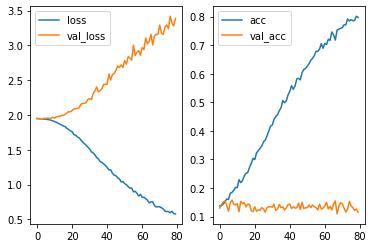

In [14]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [16]:
model.save('korean_emotion.h5')  # creates a HDF5 file

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /j